**Membuat Subset Data**

“Sudah aku sampaikan ke kepala cabang. Ini insight yang menarik menurut beliau. Ada rikues kalau provinsi ‘other’ ini, kita analisis lagi di lain waktu saja dan fokuskan untuk analisis behavior transaksi di DKI Jakarta pada bulan Oktober-Desember 2019 ini, karena trend-nya mirip dengan overall GMV. Kita fokuskan ke sana ya,” pinta Senja.

“Oke, aku coba cek dulu perbandingan GMV di kota-kota di DKI Jakarta itu seperti apa,” sahutku segera beraksi.

“Iya, berhubung kita mau fokus ke provinsi DKI Jakarta dan bulan Oktober-Desember 2019, kita filter saja datanya dan disimpan ke dataframe baru", tukas Senja sembari membantu mengarahkan kursorku untuk memberikan contoh menggunakan dataframe dataset_dki_q4.
```
dataset_dki_q4 = dataset[(dataset['province']== 'DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())
```


In [7]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset_dki_q4 = dataset[(dataset['province']== 'DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
4  BRAND_R         2     4475000     2019-10  8950000  
6  BRAND_C         1     1465000     2019-11  1465000  


**Membuat Pie Chart**

“Ini nanti dibuat pie chart-nya juga ya, Aksara. Aku jelaskan sebentar caranya.  Kita perlu membuat dulu dataframe agregat,.” Aku selalu suka mendengar penjelasan Senja karena ia selalu berusaha memaparkan langkah per langkah. Berikut cara yang dipaparkan Senja padaku:

 

Misalnya **gmv_per_city_dki_q4**, masukkan datanya ke function **plt.pie()**.

Beberapa parameter yang bisa dimodifikasi:

- labels: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
- colors: array yang berisikan warna untuk masing-masing bagian pie.
- autopct: format untuk nilai persentase yang ditampilkan, bisa berupa string atau function.
- shadow: jika diisi True, maka ada bayangan untuk pie chart-nya. Default-nya adalah False.
- radius: jari-jari dari pie-chart.
```
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center',pad=30, fontsize=15, color='blue')
plt.show()
```

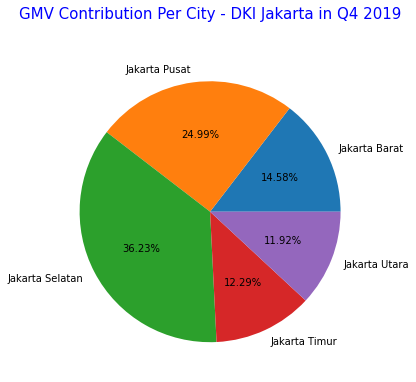

In [8]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center',pad=30, fontsize=15, color='blue')
plt.show()

**Membuat Bar Chart**

“Selain menggunakan pie chart, kita bisa pakai bar chart, tidak Nja?”

Kulihat matanya berbinar mendengar pertanyaanku. Senja mengangguk cepat dan menjawab, “Alternatif lain untuk membandingkan GMV tiap kota adalah dengan barchart. Saya lebih menyukai visualisasi ini karena lebih mudah terlihat perbandingan antar kota.”

 

Syntax dalam praktik membuat bar chart mirip dengan line chart, tentukan nilai untuk sumbu-x dan sumbu-y, lalu tambahkan parameter kind='bar' seperti berikut ini:
```
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center',pad=30,fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()
```


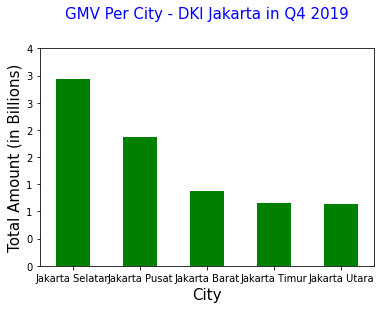

In [9]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center',pad=30,fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

Perhatikan di sini juga ditambahkan parameter rotation di plt.xtick() untuk memutar label di sumbu-x.

Sebagai catatan, jika ingin barchart-nya horizontal, maka bisa mengganti parameternya menjadi kind='barh', dengan tentu saja tidak lupa juga harus menyesuaikan sumbu x dan y-nya.

**Membuat Multi-Bar Chart**
“Aksara, dari grafik ini, kelihatannya Jakarta Selatan dan Jakarta Pusat lumayan mendominasi GMV. Tapi apakah ini konsisten di setiap bulan? Bisa tolong tampilkan?”

“Bisa, Nja. Bentar yah, ini aku buatkan dulu multi-barchart untuk analisisnya,” ujarku.

Ini kode yang kutuliskan untuk membuat multi-barchart:
```
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize= 15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

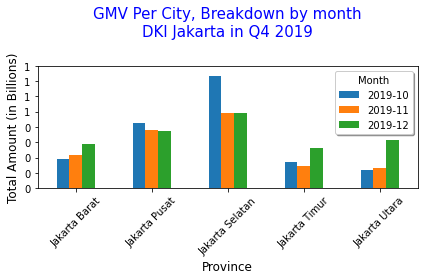

In [10]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize= 15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Membuat Stacked Chart**

“Ini udah lebih jelas. Sebagai pembanding saja, bagaimana kalau kita ubah multi-bar chart sebelumnya menjadi stacked barchart?”

 

Aku mengangguk sembari mengubah sedikit kodenya, seperti ini:
```
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True)
plt.title('GMV Per Month, Breakdown by month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize= 15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
```

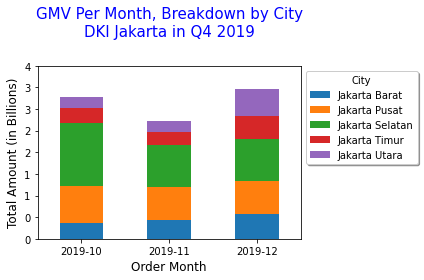

In [12]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize= 15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()